In [1]:
import sys
# !{sys.executable} pip install -U pandas-profiling

In [2]:
### Install Requirement
# !pip install -r requirements.txt
# get_ipython().system('pip install -r requirements.txt')

In [3]:
%load_ext autoreload
%autoreload
%matplotlib inline


import gc
import os
import logging
from datetime import datetime
import warnings
import numpy as np
import pandas as pd
import seaborn as sns

# import lightgbm as lgb
# from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold, KFold

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC



warnings.filterwarnings('ignore')
print("ok")

ok


In [4]:
from dsa.da.util_feature import *
from dsa.da.util_model import *
print("ok")



os.getcwd /Users/macbookssd/Desktop/my_dsa/dsa/dsa
evolutionary_search None No module named 'evolutionary_search'
lightgbm None dlopen(/Users/macbookssd/miniconda3/lib/python3.6/site-packages/lightgbm/lib_lightgbm.so, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: /Users/macbookssd/miniconda3/lib/python3.6/site-packages/lightgbm/lib_lightgbm.so
  Reason: image not found
kmodes None No module named 'kmodes'
catboost None No module named 'catboost'
tpot None No module named 'tpot'
os.getcwd /Users/macbookssd/Desktop/my_dsa/dsa/dsa
ok


# Data Loading, basic profiling

In [5]:
folder = os.getcwd() + "/"


In [6]:
df = pd.read_csv(folder + '/data/address_matching_data.csv')
df.head(5)



,id,name_levenshtein_simple,name_trigram_simple,name_levenshtein_term,name_trigram_term,city_levenshtein_simple,city_trigram_simple,city_levenshtein_term,city_trigram_term,zip_levenshtein_simple,...,phone_levenshtein,phone_trigram,fax_levenshtein,fax_trigram,street_number_levenshtein,street_number_trigram,phone_equality,fax_equality,street_number_equality,is_match
0,1204#1207,0.666667,0.666667,0.400000,0.526316,?,?,?,?,?,...,?,?,?,?,1.0,1.0,m,m,s,1
1,1272#1279,0.666667,0.666667,0.411765,0.444444,?,?,?,?,?,...,?,?,?,?,1.0,1.0,m,m,s,1
2,6258#6259,1.000000,1.000000,1.000000,1.000000,1,1,1,1,1,...,1.0,1.0,?,?,1.0,1.0,s,m,s,1
3,16076#16077,0.565476,0.333333,0.260870,0.189189,?,?,?,?,?,...,1.0,1.0,?,?,0.0,0.0,s,m,n,-1
4,2666#2671,0.666667,0.666667,0.500000,0.518519,1,1,1,1,1,...,1.0,1.0,?,?,1.0,1.0,s,m,s,1


In [7]:
df.describe()


,name_levenshtein_simple,name_trigram_simple,name_levenshtein_term,name_trigram_term,is_match
count,28235.000000,28235.000000,28235.000000,28235.000000,28235.00000
mean,0.628171,0.563277,0.537006,0.509530,0.43524
std,0.304767,0.369004,0.324820,0.372265,0.90033
min,0.000000,0.000000,0.000000,0.000000,-1.00000
25%,0.363387,0.222222,0.243243,0.142857,-1.00000
50%,0.666667,0.666667,0.476190,0.483871,1.00000
75%,1.000000,1.000000,0.875000,1.000000,1.00000
max,1.000000,1.000000,1.000000,1.000000,1.00000


In [8]:
df.columns, df.dtypes

(Index(['id', 'name_levenshtein_simple', 'name_trigram_simple',
        'name_levenshtein_term', 'name_trigram_term', 'city_levenshtein_simple',
        'city_trigram_simple', 'city_levenshtein_term', 'city_trigram_term',
        'zip_levenshtein_simple', 'zip_trigram_simple', 'zip_levenshtein_term',
        'zip_trigram_term', 'street_levenshtein_simple',
        'street_trigram_simple', 'street_levenshtein_term',
        'street_trigram_term', 'website_levenshtein_simple',
        'website_trigram_simple', 'website_levenshtein_term',
        'website_trigram_term', 'phone_levenshtein', 'phone_trigram',
        'fax_levenshtein', 'fax_trigram', 'street_number_levenshtein',
        'street_number_trigram', 'phone_equality', 'fax_equality',
        'street_number_equality', 'is_match'],
       dtype='object'), id                             object
 name_levenshtein_simple       float64
 name_trigram_simple           float64
 name_levenshtein_term         float64
 name_trigram_term      

In [9]:
### Pandas Profiling for features
# !pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
import pandas_profiling as pp
profile =  df.profile_report(title='Pandas Profiling Report')
profile.to_file(output_file="output.html")


colexclude = profile.get_rejected_variables(threshold=0.98)
colexclude 



AttributeError: 'DataFrame' object has no attribute 'profile_report'

In [10]:
colexclude = profile.get_rejected_variables(threshold=0.98)
colexclude 

NameError: name 'profile' is not defined

# Column selection by type

In [11]:
colid = "id"
colnum = ['name_levenshtein_simple', 'name_trigram_simple',
        'name_levenshtein_term', 'name_trigram_term', 'city_levenshtein_simple',
        'city_trigram_simple', 'city_levenshtein_term', 'city_trigram_term',
        'zip_levenshtein_simple', 'zip_trigram_simple', 'zip_levenshtein_term',
        'zip_trigram_term', 'street_levenshtein_simple',
        'street_trigram_simple', 'street_levenshtein_term',
        'street_trigram_term', 'website_levenshtein_simple',
        'website_trigram_simple', 'website_levenshtein_term',
        'website_trigram_term', 'phone_levenshtein', 'phone_trigram',
        'fax_levenshtein', 'fax_trigram', 'street_number_levenshtein',
        'street_number_trigram']

colcat = [ 'phone_equality', 'fax_equality',
          'street_number_equality']
coltext = []

coly = "is_match"


colall = colnum + colcat + coltext

"""

dfnum, dfcat, dfnum_bin, 
dfnum_binhot,  dfcat_hot

colnum, colcat, coltext, 
colnum_bin, colnum_binhot,  

"""

print(colall )


['name_levenshtein_simple', 'name_trigram_simple', 'name_levenshtein_term', 'name_trigram_term', 'city_levenshtein_simple', 'city_trigram_simple', 'city_levenshtein_term', 'city_trigram_term', 'zip_levenshtein_simple', 'zip_trigram_simple', 'zip_levenshtein_term', 'zip_trigram_term', 'street_levenshtein_simple', 'street_trigram_simple', 'street_levenshtein_term', 'street_trigram_term', 'website_levenshtein_simple', 'website_trigram_simple', 'website_levenshtein_term', 'website_trigram_term', 'phone_levenshtein', 'phone_trigram', 'fax_levenshtein', 'fax_trigram', 'street_number_levenshtein', 'street_number_trigram', 'phone_equality', 'fax_equality', 'street_number_equality']


# Data type normalization, Encoding process (numerics, category)

In [12]:
#Normalize to NA, NA Handling
df = df.replace("?", np.nan)



In [13]:
### colnum procesing 
for x in colnum :
    df[x] = df[x].astype("float32")

print( df.dtypes )

id                             object
name_levenshtein_simple       float32
name_trigram_simple           float32
name_levenshtein_term         float32
name_trigram_term             float32
city_levenshtein_simple       float32
city_trigram_simple           float32
city_levenshtein_term         float32
city_trigram_term             float32
zip_levenshtein_simple        float32
zip_trigram_simple            float32
zip_levenshtein_term          float32
zip_trigram_term              float32
street_levenshtein_simple     float32
street_trigram_simple         float32
street_levenshtein_term       float32
street_trigram_term           float32
website_levenshtein_simple    float32
website_trigram_simple        float32
website_levenshtein_term      float32
website_trigram_term          float32
phone_levenshtein             float32
phone_trigram                 float32
fax_levenshtein               float32
fax_trigram                   float32
street_number_levenshtein     float32
street_numbe

In [14]:
##### Colcat processing 
colcat_map = pd_colcat_mapping(df, colcat) 
                
for col in colcat :
    df[col] =  df[col].apply(lambda x : colcat_map["cat_map"][col].get(x)  )

print( df[colcat].dtypes , colcat_map)

phone_equality            int64
fax_equality              int64
street_number_equality    int64
dtype: object {'cat_map': {'phone_equality': {'m': 0, 'n': 1, 's': 2}, 'fax_equality': {'m': 0, 'n': 1, 's': 2}, 'street_number_equality': {'m': 0, 'n': 1, 's': 2}}, 'cat_map_inverse': {'phone_equality': {0: 'm', 1: 'n', 2: 's'}, 'fax_equality': {0: 'm', 1: 'n', 2: 's'}, 'street_number_equality': {0: 'm', 1: 'n', 2: 's'}}}


# Data Distribution after encoding/ data type normalization

In [15]:
#### ColTarget Distribution
coly_stat = pd_stat_distribution(df[  [  "id", coly ]] ,  subsample_ratio= 1.0)
coly_stat




Univariate distribution
id must be str, not float


,col,n,n_na,n_notna,n_na_pct,nunique,nunique_pct,xmin,xmin_freq,xmin_pct,xmax,xmax_freq,xmax_pct,xmed,xmed_freq,xmed_pct
0,is_match,28235.0,0.0,28235,0.0,2,0.000071,-1,7973,0.28238,1,20262,0.71762,1.0,20262,0.71762


In [16]:
#### Col numerics distribution
colnum_stat = pd_stat_distribution(df[colnum],  subsample_ratio= 0.6)
colnum_stat


Univariate distribution


,col,n,n_na,n_notna,n_na_pct,nunique,nunique_pct,xmin,xmin_freq,xmin_pct,xmax,xmax_freq,xmax_pct,xmed,xmed_freq,xmed_pct
0,name_levenshtein_simple,16941.0,0.0,16941,0.000000,2593,0.153061,0.000000,126,0.007438,1.0,4216,0.248864,0.666667,3505,0.206895
1,name_trigram_simple,16941.0,0.0,16941,0.000000,1401,0.082699,0.000000,2034,0.120064,1.0,4216,0.248864,0.666667,3014,0.177912
2,name_levenshtein_term,16941.0,0.0,16941,0.000000,668,0.039431,0.000000,143,0.008441,1.0,3890,0.229620,0.473684,3058,0.180509
3,name_trigram_term,16941.0,0.0,16941,0.000000,802,0.047341,0.000000,2031,0.119887,1.0,4228,0.249572,0.478261,2803,0.165457
4,city_levenshtein_simple,16941.0,11040.0,5901,0.651673,155,0.009149,0.000000,81,0.004781,1.0,4539,0.267930,1.000000,4549,0.268520
5,city_trigram_simple,16941.0,11040.0,5901,0.651673,101,0.005962,0.000000,387,0.022844,1.0,4539,0.267930,1.000000,4539,0.267930
6,city_levenshtein_term,16941.0,11040.0,5901,0.651673,94,0.005549,0.000000,83,0.004899,1.0,4642,0.274010,1.000000,4642,0.274010
7,city_trigram_term,16941.0,11040.0,5901,0.651673,101,0.005962,0.000000,387,0.022844,1.0,4647,0.274305,1.000000,4647,0.274305
8,zip_levenshtein_simple,16941.0,12357.0,4584,0.729414,19,0.001122,0.000000,181,0.010684,1.0,3562,0.210259,1.000000,3562,0.210259
9,zip_trigram_simple,16941.0,12357.0,4584,0.729414,21,0.001240,0.000000,332,0.019597,1.0,3563,0.210318,1.000000,3563,0.210318


In [17]:
#### Col stats distribution
colcat_stat = pd_stat_distribution(df[colcat], subsample_ratio= 0.3)
colcat_stat




Univariate distribution


,col,n,n_na,n_notna,n_na_pct,nunique,nunique_pct,xmin,xmin_freq,xmin_pct,xmax,xmax_freq,xmax_pct,xmed,xmed_freq,xmed_pct
0,phone_equality,8470.0,0.0,8470,0.0,3,0.000354,0,4887,0.576978,2,2372,0.280047,0.0,4887,0.576978
1,fax_equality,8470.0,0.0,8470,0.0,3,0.000354,0,8254,0.974498,2,132,0.015584,0.0,8254,0.974498
2,street_number_equality,8470.0,0.0,8470,0.0,3,0.000354,0,236,0.027863,2,4280,0.505313,2.0,4280,0.505313


# Feature processing (strategy 1)

In [18]:
### BAcKUP data before Pre-processing
dfref = copy.deepcopy( df )
print(dfref.shape)

(28235, 31)


In [19]:
df = copy.deepcopy( dfref )

In [20]:
## Map numerics to Category bin
dfnum, colnum_map = pd_colnum_tocat(df, colname=colnum, colexclude=None, colbinmap=None,
                                  bins=5, suffix="_bin", method="")


print(colnum_map)

name_levenshtein_simple
                            name_levenshtein_simple                      
                                                max  min   size      mean
name_levenshtein_simple_bin                                              
0                                          0.199916  0.0   3244  0.133234
1                                          0.399802  0.2   4352  0.284679
2                                          0.599206  0.4   4713  0.495519
3                                          0.797778  0.6   4992  0.679888
4                                          1.000000  0.8  10934  0.945298
name_trigram_simple
                        name_trigram_simple                      
                                        max  min   size      mean
name_trigram_simple_bin                                          
0                                  0.199356  0.0   6913  0.034203
1                                  0.398810  0.2   2304  0.303970
2                                 

                           website_trigram_simple                           
                                              max       min   size      mean
website_trigram_simple_bin                                                  
-1                                            NaN       NaN  26416       NaN
 0                                       0.212903  0.028219     45  0.127279
 1                                       0.414286  0.223214    163  0.346492
 2                                       0.606061  0.420000    292  0.486172
 3                                       0.800000  0.613889    254  0.722279
 4                                       1.000000  0.810458   1065  0.978935
website_levenshtein_term
                             website_levenshtein_term                   \
                                                  max       min   size   
website_levenshtein_term_bin                                             
-1                                                NaN       

In [21]:
colnum_bin =  [  x + "_bin" for x in  list( colnum_map.keys() )   ]
print( colnum_bin )




['name_levenshtein_simple_bin', 'name_trigram_simple_bin', 'name_levenshtein_term_bin', 'name_trigram_term_bin', 'city_levenshtein_simple_bin', 'city_trigram_simple_bin', 'city_levenshtein_term_bin', 'city_trigram_term_bin', 'zip_levenshtein_simple_bin', 'zip_trigram_simple_bin', 'zip_levenshtein_term_bin', 'zip_trigram_term_bin', 'street_levenshtein_simple_bin', 'street_trigram_simple_bin', 'street_levenshtein_term_bin', 'street_trigram_term_bin', 'website_levenshtein_simple_bin', 'website_trigram_simple_bin', 'website_levenshtein_term_bin', 'website_trigram_term_bin', 'phone_levenshtein_bin', 'phone_trigram_bin', 'fax_levenshtein_bin', 'fax_trigram_bin', 'street_number_levenshtein_bin', 'street_number_trigram_bin']


In [22]:
dfnum[colnum_bin].head(7)




,name_levenshtein_simple_bin,name_trigram_simple_bin,name_levenshtein_term_bin,name_trigram_term_bin,city_levenshtein_simple_bin,city_trigram_simple_bin,city_levenshtein_term_bin,city_trigram_term_bin,zip_levenshtein_simple_bin,zip_trigram_simple_bin,...,website_levenshtein_simple_bin,website_trigram_simple_bin,website_levenshtein_term_bin,website_trigram_term_bin,phone_levenshtein_bin,phone_trigram_bin,fax_levenshtein_bin,fax_trigram_bin,street_number_levenshtein_bin,street_number_trigram_bin
0,3,3,2,2,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,4,4
1,3,3,2,2,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,4,4
2,4,4,4,4,4,4,4,4,4,4,...,-1,-1,-1,-1,-1,4,-1,-1,4,4
3,2,1,1,0,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,4,-1,-1,0,0
4,3,3,2,2,4,4,4,4,4,4,...,-1,-1,-1,-1,-1,4,-1,-1,4,4
5,4,4,4,4,4,4,4,4,4,4,...,-1,4,4,4,-1,4,-1,-1,4,4
6,0,0,0,0,4,4,4,4,4,1,...,-1,-1,-1,-1,-1,-1,-1,-1,2,1


In [23]:
### numerics bin to One Hot
dfnum_hot = pd_col_to_onehot(dfnum[colnum_bin], colname=colnum_bin)
colnum_hot = list( dfnum_hot.columns )
dfnum_hot.head(10)



name_levenshtein_simple_bin 5 (28235, 26)
name_trigram_simple_bin 5 (28235, 30)
name_levenshtein_term_bin 5 (28235, 34)
name_trigram_term_bin 5 (28235, 38)
city_levenshtein_simple_bin 6 (28235, 42)
city_trigram_simple_bin 6 (28235, 47)
city_levenshtein_term_bin 6 (28235, 52)
city_trigram_term_bin 6 (28235, 57)
zip_levenshtein_simple_bin 6 (28235, 62)
zip_trigram_simple_bin 6 (28235, 67)
zip_levenshtein_term_bin 6 (28235, 72)
zip_trigram_term_bin 6 (28235, 77)
street_levenshtein_simple_bin 6 (28235, 82)
street_trigram_simple_bin 6 (28235, 87)
street_levenshtein_term_bin 6 (28235, 92)
street_trigram_term_bin 6 (28235, 97)
website_levenshtein_simple_bin 6 (28235, 102)
website_trigram_simple_bin 6 (28235, 107)
website_levenshtein_term_bin 6 (28235, 112)
website_trigram_term_bin 6 (28235, 117)
phone_levenshtein_bin 6 (28235, 122)
phone_trigram_bin 6 (28235, 127)
fax_levenshtein_bin 6 (28235, 132)
fax_trigram_bin 6 (28235, 137)
street_number_levenshtein_bin 6 (28235, 142)
street_number_trigr

,name_levenshtein_simple_bin_0,name_levenshtein_simple_bin_1,name_levenshtein_simple_bin_2,name_levenshtein_simple_bin_3,name_levenshtein_simple_bin_4,name_trigram_simple_bin_0,name_trigram_simple_bin_1,name_trigram_simple_bin_2,name_trigram_simple_bin_3,name_trigram_simple_bin_4,...,street_number_levenshtein_bin_0,street_number_levenshtein_bin_1,street_number_levenshtein_bin_2,street_number_levenshtein_bin_3,street_number_levenshtein_bin_4,street_number_trigram_bin_-1,street_number_trigram_bin_0,street_number_trigram_bin_1,street_number_trigram_bin_2,street_number_trigram_bin_4
0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
3,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
5,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
6,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
7,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
8,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [24]:
0


0

In [25]:
dfcat_hot = pd_col_to_onehot(df[colcat], colname=colcat, return_val="dataframe,column")
colcat_hot = list( dfcat_hot.columns )
dfcat_hot.head(5)




phone_equality 3 (28235, 3)
fax_equality 3 (28235, 5)
street_number_equality 3 (28235, 7)


,phone_equality_0,phone_equality_1,phone_equality_2,fax_equality_0,fax_equality_1,fax_equality_2,street_number_equality_0,street_number_equality_1,street_number_equality_2
0,1,0,0,1,0,0,0,0,1
1,1,0,0,1,0,0,0,0,1
2,0,0,1,1,0,0,0,0,1
3,0,0,1,1,0,0,0,1,0
4,0,0,1,1,0,0,0,0,1


# Train data preparation

In [26]:
#### Train data preparation
X = pd.concat(( dfnum_hot, dfcat_hot ), axis=1)
colX = list( X.columns )
X  = X.values
yy = df[coly].values

Xtrain, Xtest, ytrain, ytest = train_test_split( X,  yy,   
                                                 random_state=42,
                                                 test_size=0.5, shuffle=True)


print( Xtrain.shape, Xtest.shape, colX) 

(14117, 160) (14118, 160) ['name_levenshtein_simple_bin_0', 'name_levenshtein_simple_bin_1', 'name_levenshtein_simple_bin_2', 'name_levenshtein_simple_bin_3', 'name_levenshtein_simple_bin_4', 'name_trigram_simple_bin_0', 'name_trigram_simple_bin_1', 'name_trigram_simple_bin_2', 'name_trigram_simple_bin_3', 'name_trigram_simple_bin_4', 'name_levenshtein_term_bin_0', 'name_levenshtein_term_bin_1', 'name_levenshtein_term_bin_2', 'name_levenshtein_term_bin_3', 'name_levenshtein_term_bin_4', 'name_trigram_term_bin_0', 'name_trigram_term_bin_1', 'name_trigram_term_bin_2', 'name_trigram_term_bin_3', 'name_trigram_term_bin_4', 'city_levenshtein_simple_bin_-1', 'city_levenshtein_simple_bin_0', 'city_levenshtein_simple_bin_1', 'city_levenshtein_simple_bin_2', 'city_levenshtein_simple_bin_3', 'city_levenshtein_simple_bin_4', 'city_trigram_simple_bin_-1', 'city_trigram_simple_bin_0', 'city_trigram_simple_bin_1', 'city_trigram_simple_bin_2', 'city_trigram_simple_bin_3', 'city_trigram_simple_bin_4',

In [27]:
0

0

# Model evaluation

In [28]:
### Baseline : L2 penalty to reduce overfitting
clf_log = sk.linear_model.LogisticRegression(penalty = 'l2' , class_weight = 'balanced')






############# Train dataset  ####################################
Test confusion matrix
[[3776  265]
 [ 711 9365]]
[[0.93442217 0.06557783]
 [0.07056372 0.92943628]]
auc 0.9823520285670527
gini 0.9647040571341055
acc 0.9308634979103209
f1macro 0.9180127042001476
Nsample 14117
              precision    recall  f1-score   support

           0       0.84      0.93      0.89      4041
           1       0.97      0.93      0.95     10076

   micro avg       0.93      0.93      0.93     14117
   macro avg       0.91      0.93      0.92     14117
weighted avg       0.94      0.93      0.93     14117



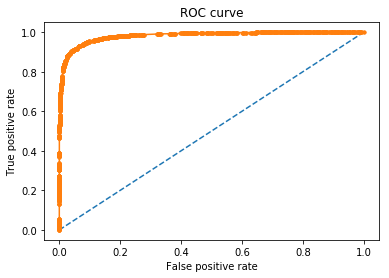

############# Test dataset  #########################################
Test confusion matrix
[[3662  270]
 [ 744 9442]]
[[0.93133266 0.06866734]
 [0.07304143 0.92695857]]
auc 0.9817024029550862
gini 0.9634048059101723
acc 0.9281767955801105
f1macro 0.913714103597814
Nsample 14118
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      3932
           1       0.97      0.93      0.95     10186

   micro avg       0.93      0.93      0.93     14118
   macro avg       0.90      0.93      0.91     14118
weighted avg       0.93      0.93      0.93     14118



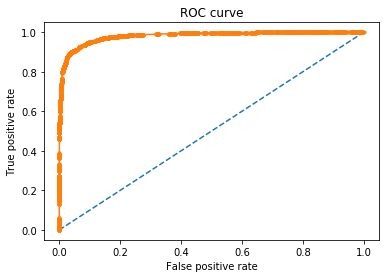

In [29]:
clf_log, dd = sk_model_eval_classification(clf_log, 1,
                                           Xtrain, ytrain, Xtest, ytest)



############# CV-0######################################
############# Train dataset  ####################################
Test confusion matrix
[[3743  234]
 [ 699 9441]]
[[0.94116168 0.05883832]
 [0.06893491 0.93106509]]
auc 0.9839025580519942
gini 0.9678051161039884
acc 0.9339094708507474
f1macro 0.9210468480912509
Nsample 14117
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      3977
           1       0.98      0.93      0.95     10140

   micro avg       0.93      0.93      0.93     14117
   macro avg       0.91      0.94      0.92     14117
weighted avg       0.94      0.93      0.93     14117



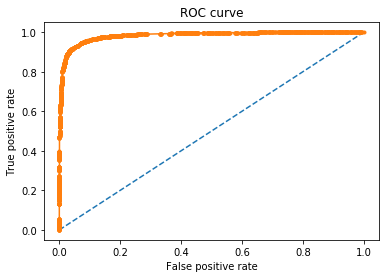

############# Test dataset  #########################################
Test confusion matrix
[[3706  290]
 [ 810 9312]]
[[0.92742743 0.07257257]
 [0.08002371 0.91997629]]
auc 0.9804696639931771
gini 0.9609393279863543
acc 0.9220852812013033
f1macro 0.9075005279625753
Nsample 14118
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      3996
           1       0.97      0.92      0.94     10122

   micro avg       0.92      0.92      0.92     14118
   macro avg       0.90      0.92      0.91     14118
weighted avg       0.93      0.92      0.92     14118



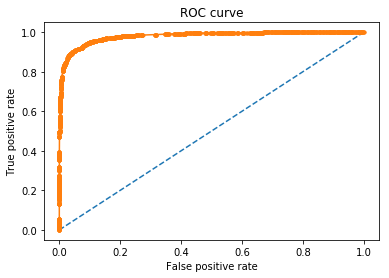

############# CV-1######################################
############# Train dataset  ####################################
Test confusion matrix
[[3754  250]
 [ 679 9434]]
[[0.93756244 0.06243756]
 [0.0671413  0.9328587 ]]
auc 0.9839403155926443
gini 0.9678806311852886
acc 0.934192817170787
f1macro 0.9214817346403796
Nsample 14117
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4004
           1       0.97      0.93      0.95     10113

   micro avg       0.93      0.93      0.93     14117
   macro avg       0.91      0.94      0.92     14117
weighted avg       0.94      0.93      0.94     14117



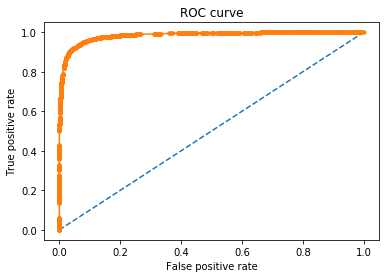

############# Test dataset  #########################################
Test confusion matrix
[[3695  274]
 [ 761 9388]]
[[0.93096498 0.06903502]
 [0.07498276 0.92501724]]
auc 0.980238040994672
gini 0.9604760819893441
acc 0.9266893327666809
f1macro 0.9124538161591431
Nsample 14118
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      3969
           1       0.97      0.93      0.95     10149

   micro avg       0.93      0.93      0.93     14118
   macro avg       0.90      0.93      0.91     14118
weighted avg       0.93      0.93      0.93     14118



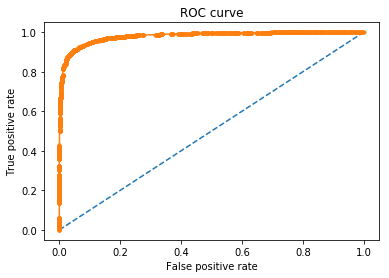

############# CV-2######################################
############# Train dataset  ####################################
Test confusion matrix
[[3712  256]
 [ 747 9402]]
[[0.93548387 0.06451613]
 [0.07360331 0.92639669]]
auc 0.9818100672956815
gini 0.9636201345913631
acc 0.9289509102500532
f1macro 0.9151695731615956
Nsample 14117
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      3968
           1       0.97      0.93      0.95     10149

   micro avg       0.93      0.93      0.93     14117
   macro avg       0.90      0.93      0.92     14117
weighted avg       0.93      0.93      0.93     14117



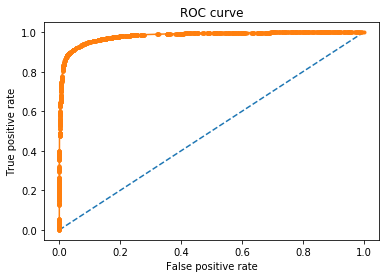

############# Test dataset  #########################################
Test confusion matrix
[[3769  236]
 [ 769 9344]]
[[0.94107366 0.05892634]
 [0.07604074 0.92395926]]
auc 0.9821752276676798
gini 0.9643504553353597
acc 0.9288142796430089
f1macro 0.9156632323251932
Nsample 14118
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      4005
           1       0.98      0.92      0.95     10113

   micro avg       0.93      0.93      0.93     14118
   macro avg       0.90      0.93      0.92     14118
weighted avg       0.93      0.93      0.93     14118



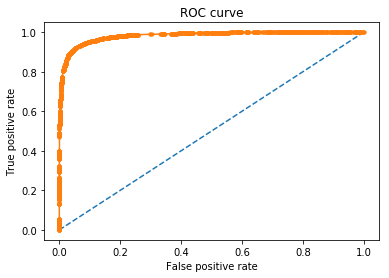

{0: LogisticRegression(C=1.0, class_weight='balanced', dual=False,
           fit_intercept=True, intercept_scaling=1, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
           solver='warn', tol=0.0001, verbose=0, warm_start=False),
 1: LogisticRegression(C=1.0, class_weight='balanced', dual=False,
           fit_intercept=True, intercept_scaling=1, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
           solver='warn', tol=0.0001, verbose=0, warm_start=False),
 2: LogisticRegression(C=1.0, class_weight='balanced', dual=False,
           fit_intercept=True, intercept_scaling=1, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
           solver='warn', tol=0.0001, verbose=0, warm_start=False)}

In [30]:
sk_model_eval_classification_cv(clf_log,  X, yy, test_size=0.5, ncv=3 )



In [31]:
clf_log_feat = sk_feature_impt_logis(clf_log, colX)
clf_log_feat 



NameError: name 'sk_feature_impt_logis' is not defined

In [ ]:

1

In [32]:
### Light GBM
clf_lgb = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l2', 
                         max_depth= 15, n_estimators = 50, objective= 'binary',
                         num_leaves = 38, njobs= -1 )



AttributeError: 'NoneType' object has no attribute 'LGBMClassifier'

In [33]:
clf_lgb, dd_lgb = sk_model_eval_classification(clf_lgb, 1,
                                           Xtrain, ytrain, Xtest, ytest)


NameError: name 'clf_lgb' is not defined

In [34]:
import shap
shap.initjs()

dftest = pd.DataFrame( columns=colall, data=Xtest)

explainer = shap.TreeExplainer( clf_lgb )
shap_values = explainer.shap_values(  dftest )

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], dftest.iloc[0,:] )



ModuleNotFoundError: No module named 'shap'

In [35]:
# visualize the training set predictions
# shap.force_plot(explainer.expected_value, shap_values, dftest)

# Plot summary_plot as barplot:
#shap.summary_plot(shap_values, Xtest, plot_type='bar')



In [36]:
lgb_feature_imp = pd.DataFrame(sorted(zip(clf_lgb.feature_importances_, colall)), columns=['value','feature'])
lgb_feature_imp = lgb_feature_imp.sort_values( "value", ascending=0 )
print(lgb_feature_imp )


plotbar(lgb_feature_imp.iloc[:10,:], colname=["value", "feature"],  
        title="feature importance", savefile="lgb_feature_imp.png") 




NameError: name 'clf_lgb' is not defined

In [37]:
kf = StratifiedKFold(n_splits=3, shuffle=True)
# partially based on https://www.kaggle.com/c0conuts/xgb-k-folds-fastai-pca
clf_list = []
for itrain, itest in kf.split(X, yy):
    print("###")
    Xtrain, Xval = X[ itrain ], X[ itest ]
    ytrain, yval = yy[ itrain ], yy[ itest ]
    clf_lgb.fit(Xtrain, ytrain, eval_set=[(Xval, yval)], 
            early_stopping_rounds=20)
    
    
    clf_list.append( clf_lgb)
    
    




###


NameError: name 'clf_lgb' is not defined

In [38]:
for i, clfi in enumerate( clf_list) :
    print(i)
    clf_lgbi, dd_lgbi = sk_model_eval_classification(clfi, 0,
                                               Xtrain, ytrain, Xtest, ytest)
    

In [39]:
def np_find_indice(v, x) :
  for i, j in enumerate(v):
    if j == x :
       return i
  return -1




def col_getnumpy_indice(colall, colcat) :
    return [  np_find_indice(colall, x)  for x in colcat ]



In [40]:
#### CatbOost
import catboost as cb

colcat_idx = col_getnumpy_indice(colall, colcat)

clf_cb = cb.CatBoostClassifier( iterations=1000, depth=8,
                          learning_rate=0.02, loss_function='Logloss',
                          eval_metric='AUC', random_seed=42,
                          rsm = 0.2, # features subsample 
                          od_type = 'Iter', # early stopping odwait = 100, # early stopping
                          verbose = 100,l2_leaf_reg = 20, # regularisation 
)






ModuleNotFoundError: No module named 'catboost'

In [41]:
#clf_cb, dd_cb = sk_model_eval_classification(clf_cb, 1,
#                                               Xtrain, ytrain, Xtest, ytest)


clf_cb.fit(Xtrain, ytrain,
                 eval_set=(Xtest, ytest),
                 cat_features= np.arange(0, Xtrain.shape[1]),
                 use_best_model=True)


NameError: name 'clf_cb' is not defined

In [ ]:
# Fitting a SVM
clf_svc = SVC(C=1.0, probability=True) # since we need probabilities

clf_svc, dd_svc = sk_model_eval_classification(clf_svc, 1,
                                               Xtrain, ytrain, Xtest, ytest)



############# Train dataset  ####################################


In [ ]:
### MLP Classifier
from sklearn.neural_network import MLPClassifier

clf_nn = MLPClassifier( hidden_layer_sizes=(50,), max_iter=80, alpha=1e-4,
                        activation="relu",
                        solver='adam', verbose=10, tol=1e-4, random_state=1,
                        learning_rate_init= 0.1, early_stopping=True, validation_fraction=0.2 )
                       
                     

In [ ]:
clf_nn, dd_nn = sk_model_eval_classification(clf_nn, 1,
                                           Xtrain, ytrain, Xtest, ytest)



In [ ]:
### Feature Selection (reduce over-fitting)
   #Pre model feature selection (sometimes some features are useful even with low variance....)
   #Post model feature selection




In [ ]:
### Model independant Selection
colX_kbest= sk_model_eval_feature(clf_nn,  method="f_classif", colname= colX, kbest=50,
                                 Xtrain= Xtrain, ytrain= ytrain)


print( colX_kbest )

# Ensembling 

In [ ]:
from sklearn.ensemble import VotingClassifier

clf_list = []
clf_list.append( ("clf_log", clf_log) )
clf_list.append( ("clf_lgb", clf_lgb) )
clf_list.append( ("clf_svc", clf_svc) )


clf_ens1 = VotingClassifier(clf_list, voting= "soft")  #Soft is required
print(clf_ens1)




In [ ]:
sk_model_eval_classification(clf_ens1, 1,
                                           Xtrain, ytrain, Xtest, ytest)


# Predict values

In [ ]:
dft = pd.read_csv(folder + '/data/address_matching_data.csv')

In [ ]:
#####
dft = dft.replace("?",  np.nan)








In [ ]:
dft[colcat].head(3)

In [ ]:
#### Pre-processing  cat :  New Cat are discard, Missing one are included
for col in colcat :
    try :
       dft[col] = dft[col].apply(lambda x : colcat_map["cat_map"][col].get(x)  )
    except Exception as e:
       print(col, e) 
    
    
dft_colcat_hot = pd_col_to_onehot( dft[colcat], colcat)    
    

for x in colcat_hot  :
     if not x in dft_colcat_hot.columns :
        dft_colcat_hot[x] = 0
        print(x, "added")    

        
dft_colcat_hot[colcat_hot].head(5)    

        

In [ ]:
dft_colcat_hot.head(4)

In [ ]:
#### Pre-processing num :  REUSE Colnum_map and Pad the missing values
dft_numbin, _ = pd_colnum_tocat(dft[colnum], colname=colnum, colexclude=None,
                                 colbinmap = colnum_map,
                                 bins=0, suffix="_bin", method="")






In [ ]:
dft_numbin.head(5)

In [ ]:
dft_num_hot = pd_col_to_onehot( dft_numbin[colnum_bin], colname=colnum_bin, 
                                   colonehot = colnum_hot)
    

In [ ]:
dft_num_hot.head(5)



In [ ]:
print( dft_num_hot.shape,  dfnum_hot.shape )



In [ ]:
#### Train 
X= pd.concat(( dft_num_hot, dfcat_hot ), axis=1).values

print(X.shape)



In [ ]:
dft[coly] = clf_ens1.predict(X)

In [ ]:
dft.head(5)

In [ ]:
dft.groupby(coly).agg({"id" : "count"})

In [ ]:
dft[[ "id", "is_match"  ]].to_csv("adress_pred.csv" , index=False, mode="w")

In [ ]:
### NA handling
df_ = train_df.append(test_df)
use_columns = [s for s in df_.columns if s not in ['id', 'is_match']]
df = df_[use_columns]

for c in df.columns:
    if df[c].dtype=='object':
        df.loc[df[c]=='?', c]=0
    else:
        print('skip ', c)


In [ ]:
### Encode numerical into Category to handle NA distribution



In [ ]:
0




In [ ]:
0


In [ ]:
"""
Sparse Logistics


"""

In [ ]:
0

In [ ]:
### NO Null Features
len(df_featlogis[df_featlogis["coef_abs"] > 0.0 ])

In [ ]:

preds = clf.predict(test_df[feats])
preds[preds==0] = -1


In [ ]:
test_df = pd.read_csv('./data/address_matching_test.csv')
test_df['is_match'] = preds.astype(int)
test_df = test_df.reset_index()
test_df[['id', 'is_match']].to_csv('result.csv', index=False)


